In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten,Dropout
from tensorflow.keras.layers import Dense

In [2]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), padding='same'))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
images, classNo = [], []
for i in range(1,3829):
    curImg = cv2.imread("without_mask/without_mask_"+str(i)+".jpg")
    curImg = cv2.resize(curImg,(128,128))
    images.append(curImg)
    classNo.append(0)
for i in range(1,3726):
    curImg = cv2.imread("mask/with_mask_"+str(i)+".jpg")
    curImg = cv2.resize(curImg,(128,128))
    images.append(curImg)
    classNo.append(1)

In [4]:
images = np.array(images)
classNo = np.array(classNo)

print(images.shape)
print(classNo.shape)

(7553, 128, 128, 3)
(7553,)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(images,classNo,test_size=0.25, random_state=101)

In [6]:
X_train = X_train.reshape(X_train.shape[0],128,128,3)
X_test = X_test.reshape(X_test.shape[0],128,128,3)
X_train.shape, X_test.shape

((5664, 128, 128, 3), (1889, 128, 128, 3))

In [7]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)

In [8]:
dataGen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=20)
dataGen.fit(X_train)

In [10]:
history = model.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test))

Epoch 1/50
177/177 [==============================] - 4s 25ms/step - loss: 9.8452e-05 - accuracy: 1.0000 - val_loss: 0.9077 - val_accuracy: 0.9449
Epoch 2/50
177/177 [==============================] - 4s 23ms/step - loss: 0.1176 - accuracy: 0.9656 - val_loss: 0.2899 - val_accuracy: 0.9307
Epoch 3/50
177/177 [==============================] - 5s 27ms/step - loss: 0.0915 - accuracy: 0.9705 - val_loss: 0.4966 - val_accuracy: 0.9407
Epoch 4/50
177/177 [==============================] - 5s 29ms/step - loss: 0.0586 - accuracy: 0.9831 - val_loss: 0.4875 - val_accuracy: 0.9333
Epoch 5/50
177/177 [==============================] - 5s 31ms/step - loss: 0.0430 - accuracy: 0.9843 - val_loss: 0.3121 - val_accuracy: 0.9370
Epoch 6/50
177/177 [==============================] - 5s 30ms/step - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.3812 - val_accuracy: 0.9455
Epoch 7/50
177/177 [==============================] - 5s 31ms/step - loss: 0.0328 - accuracy: 0.9887 - val_loss: 0.4612 - val_accuracy: 0.

In [11]:
history

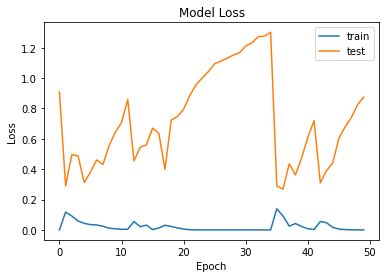

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()

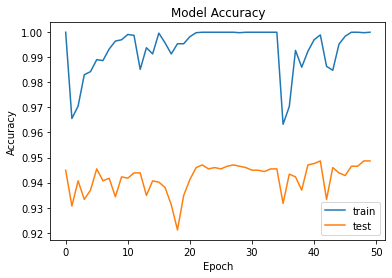

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.show()

In [14]:
  model.evaluate(X_test, Y_test)

60/60 [==============================] - 1s 11ms/step - loss: 0.8749 - accuracy: 0.9487


[0.8748944997787476, 0.948650062084198]

In [15]:
model.predict(X_test)

array([[1.00000000e+00],
       [7.07907437e-20],
       [1.00000000e+00],
       ...,
       [1.00000000e+00],
       [1.00000000e+00],
       [1.21983796e-17]], dtype=float32)

In [16]:
import cv2
haar_data = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [17]:
cap = cv2.VideoCapture(0)
while True:
    success, img = cap.read()
    img = cv2.flip(img, 1)
    if success:
        faces = haar_data.detectMultiScale(img)
        for x, y, w, h in faces:
            cv2.rectangle(img, (x-5,y-5), (x+w+5,y+h+5), (0,255,0), 4)
            
            face = img[y:y+h, x:x+w, :]
            
            face = cv2.resize(face, (128, 128))
            
            face = np.array(face)
            face = face.reshape(1,128,128,3)
            if model.predict(face) > 0.5:
                state = 'Mask'
            else:
                state = 'Without Mask'
                
            cv2.putText(img, state, (x-5,y-5), cv2.FONT_HERSHEY_PLAIN,2,(0,255,0),2)
            
        cv2.imshow('Faces', img)
        
        if cv2.waitKey(1) == 27:
            break
            
cap.release()
cv2.destroyAllWindows()

In [18]:
cap.release()
cv2.destroyAllWindows()

In [40]:
model.save('mask_detection_model.h5')